In [1]:
from goods_s.objects import *

/home/tdshield/miniconda3/envs/research/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
high_z_ids = np.array([86029, 96216, 128771, 130158, 131067])
z = np.array([10.22557, 12.63, 13.2, 11.66794, 10.40945])

In [3]:
i = 2
# test = high_z_ids[i]
test = 79116
print(test)

o = obj(test)
z = z[i]

79116


In [4]:
fit, __ = o.run_bagpipes(z='phot', fit_instructions='dbl_power_law', aperture='CIRC1')


Bagpipes: fitting object 79116

Starting the nautilus sampler...
Please report issues at github.com/johannesulf/nautilus.
Status    | Bounds | Ellipses | Networks | Calls    | f_live | N_eff | log Z    
Finished  | 38     | 1        | 4        | 63900    | N/A    | 10278 | +897.06  

Completed in 1340.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
dblplaw:alpha                  0.033      0.325      4.439
dblplaw:beta                  49.231     99.013    391.998
dblplaw:massformed             8.145      8.199      8.260
dblplaw:metallicity            0.259      0.311      0.369
dblplaw:tau                    1.348      1.363      1.382
dust:Av                        0.369      0.424      0.476
nebular:logU                  -1.494     -1.289     -1.103




/home/tdshield/miniconda3/envs/research/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:278: RuntimeWarning: overflow encountered in power
  sfr[mask] = ((t/tau)**alpha + (t/tau)**-beta)**-1


In [5]:
sfh = np.percentile(fit.posterior.samples['sfh'], (16, 50, 84), axis=0)
sfh.shape

(3, 1654)

In [6]:
ages = fit.posterior.sfh.ages[:1654]
x = sfr_x_axis(ages, z)

(0.0, 4.823620625759557)

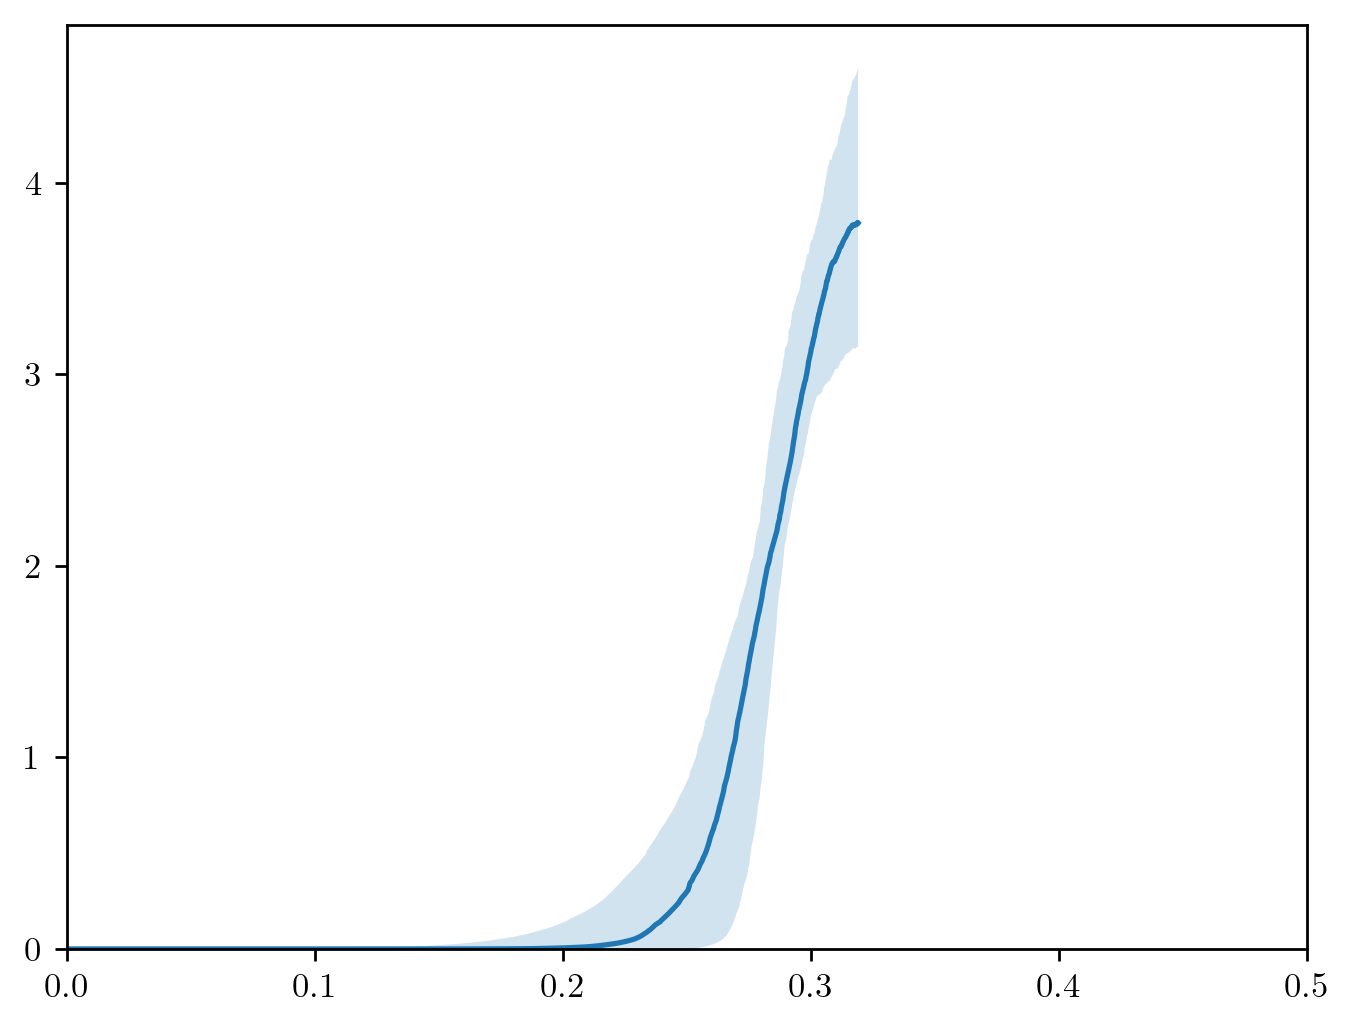

In [7]:
latex()

plt.plot(x, sfh[1, :])
plt.fill_between(x, sfh[0, :], sfh[2, :], alpha=0.2)
plt.xlim(0, 0.5)
plt.ylim(0)